# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы Куликов Павел Максимович БВТ2005
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

In [1]:
import turtle
import time

width = 1200
height = 600


#### L-система

In [2]:
class LSystem2D:
    def __init__(self, t, axiom, width, length, angle):
        self.axiom = axiom      # инициатор
        self.state = axiom      # строка с набором команд для фрактала (вначале это инициатор)
        self.width = width      # толщина линии рисования
        self.length = length    # длина одного линейного сегмента кривой
        self.angle = angle      # фиксированный угол поворота
        self.t = t              # сама черепашка
        self.rules = {}  # словарь для хранения правил формирования кривых
        self.t.pensize(self.width)

    def add_rules(self, *rules):
        for key, value in rules:
            self.rules[key] = value

    def generate_path(self, n_iter):
        for key, value in self.rules.items():
            self.state = self.state.replace(key, value.lower())

        self.state = self.state.upper()

        if n_iter > 0: self.generate_path(n_iter - 1)

    def set_turtle(self, my_tuple):
        self.t.up()
        self.t.goto(my_tuple[0], my_tuple[1])
        self.t.seth(my_tuple[2])
        self.t.down()

    def draw_turtle(self, start_pos, start_angle):
        # ***************
        turtle.tracer(1, 0)  # форсажный режим для черепашки
        self.t.up()  # черепашка воспаряет над поверхностью (чтобы не было следа)
        self.t.setpos(start_pos)  # начальная стартовая позиция
        self.t.seth(start_angle)  # начальный угол поворота
        self.t.down()  # черепашка опускается на "грешную землю"
        turtle_stack = []
        # ***************
        for move in self.state:
            if move == 'F':
                self.t.forward(self.length)
            elif move == 'S':
                self.t.up()
                self.t.forward(self.length)
                self.t.down()
            elif move == '+':
                self.t.left(self.angle)
            elif move == '-':
                self.t.right(self.angle)
            elif move == "[":
                turtle_stack.append((self.t.xcor(), self.t.ycor(), self.t.heading(), self.t.pensize()))
            elif move == "]":
                xcor, ycor, head, w = turtle_stack.pop()
                self.set_turtle((xcor, ycor, head))
                self.width = w
                self.t.pensize(self.width)

#### Кривая Коха

In [3]:
def koch_draw(t, ln, lvl):
    if ln > 6 and lvl:
        ln3 = ln // 3
        koch_draw(t, ln3, lvl-1)
        t.left(60)
        koch_draw(t, ln3, lvl-1)
        t.right(120)
        koch_draw(t, ln3, lvl-1)
        t.left(60)
        koch_draw(t, ln3, lvl-1)
    else:
        t.fd(ln)
        t.left(60)
        t.fd(ln)
        t.right(120)
        t.fd(ln)
        t.left(60)
        t.fd(ln)
        lvl -= 1


def koch_curve(t, lvl):
    t.reset()
    koch_deepth = 0
    ln = 200
    t.speed(500)
    start = time.time()
    koch_draw(t, ln, lvl)
    finish = round((time.time() - start)*1000)
    koch_info.append(finish)


koch_deepth =0
koch_info = []
screen = turtle.Screen()
screen.setup(1200, 600, -1000, 0)
t = turtle.Turtle()
t.ht()

for lvl in range(5):
    koch_curve(t, lvl)
for i in range(5):
    print("Глубина", i + 1, "время --- {0:7d} ms ---".format(koch_info[i]))
turtle.done()

Глубина 1 время ---      81 ms ---
Глубина 2 время ---     367 ms ---
Глубина 3 время ---    1474 ms ---
Глубина 4 время ---    5971 ms ---
Глубина 5 время ---   23038 ms ---


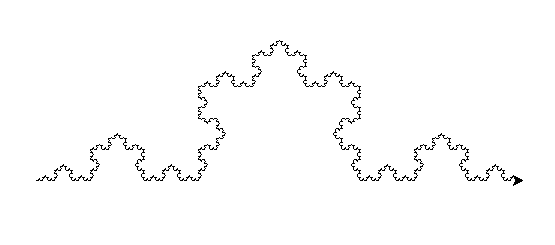

#### Кривая Гильберта

In [3]:
screen = turtle.Screen()
screen.setup(width, height, 0, 0)

t = turtle.Turtle()
t.ht()

pen_width = 2
f_len = 10
angle = 90
axiom = "L"

gilbert_curve_info = []

t = turtle.Turtle()
for lvl in range(5):
    t.reset()
    t.ht()
    l_sys = LSystem2D(t, axiom, pen_width, f_len, angle)
    l_sys.add_rules(("L", "+RF-LFL-FR+"), ('R', '-LF+RFR+FL-'))
    start = time.time()
    l_sys.generate_path(lvl)
    l_sys.draw_turtle((0, 0), -180)
    finish = round((time.time() - start) * 1000)
    gilbert_curve_info.append(finish)
for i in range(5):
    print("Глубина", i + 1, "время --- {0:7d} ms ---".format(gilbert_curve_info[i]))

turtle.done()

Глубина 1 время ---      21 ms ---
Глубина 2 время ---     110 ms ---
Глубина 3 время ---     556 ms ---
Глубина 4 время ---    2519 ms ---
Глубина 5 время ---   10726 ms ---


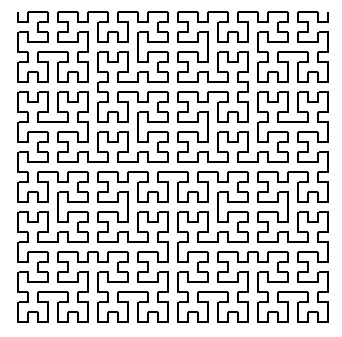

#### Кривая Серпинского

In [3]:
screen = turtle.Screen()
screen.setup(width, height, 0, 0)

t = turtle.Turtle()
t.ht()

pen_width = 2
f_len = 5
angle = 90
axiom = "F+XF+F+XF"

serpinskiy_curve_info = []

t = turtle.Turtle()
for lvl in range(5):
    t.reset()
    t.ht()
    l_sys = LSystem2D(t, axiom, pen_width, f_len, angle)
    l_sys.add_rules(("X", "XF-F+F-XF+F+XF-F+F-X"))
    start = time.time()
    l_sys.generate_path(lvl)
    l_sys.draw_turtle((0, 0), 0)
    finish = round((time.time() - start) * 1000)
    serpinskiy_curve_info.append(finish)
for i in range(5):
    print("Глубина", i + 1, "время --- {0:7d} ms ---".format(serpinskiy_curve_info[i]))

turtle.done()

Глубина 1 время ---      21 ms ---
Глубина 2 время ---     127 ms ---
Глубина 3 время ---     663 ms ---
Глубина 4 время ---    2974 ms ---
Глубина 5 время ---   12860 ms ---


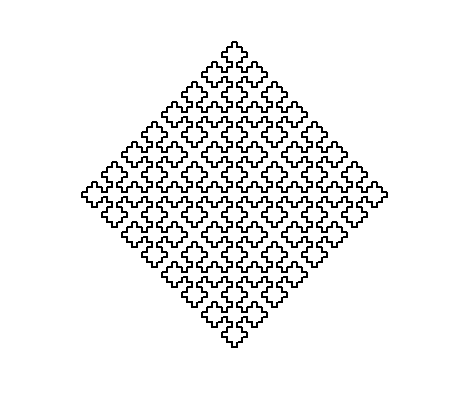

#### Салфетка Серпинского

In [3]:
screen = turtle.Screen()
screen.setup(width, height, 0, 0)

t = turtle.Turtle()
t.ht()

pen_width = 2
f_len = 5
angle = 60
axiom = "FXF--FF--FF"

scarpet_info = []

t = turtle.Turtle()
for lvl in range(5):
    t.reset()
    t.ht()
    l_sys = LSystem2D(t, axiom, pen_width, f_len, angle)
    l_sys.add_rules(("F", "FF"), ('X', '--FXF++FXF++FXF--'))
    start = time.time()
    l_sys.generate_path(lvl)
    l_sys.draw_turtle((0, 0), -180)
    finish = round((time.time() - start) * 1000)
    scarpet_info.append(finish)
for i in range(5):
    print("Глубина", i + 1, "время --- {0:7d} ms ---".format(scarpet_info[i]))

turtle.done()

Глубина 1 время ---      22 ms ---
Глубина 2 время ---      57 ms ---
Глубина 3 время ---     191 ms ---
Глубина 4 время ---     628 ms ---
Глубина 5 время ---    2353 ms ---


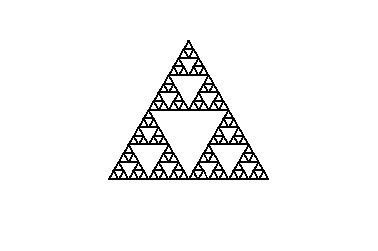

####  Ковер Серпинского

In [10]:
def s(n, l):
    if n == 0:
        turtle.color('black')
        turtle.begin_fill()
        for _ in range (4):
            turtle.forward(l)
            turtle.left(90)
        turtle.end_fill()
    else:
        for _ in range(4):
            s(n-1, l/3)
            turtle.forward(l/3)

            s(n-1, l/3)
            turtle.forward(l/3)

            turtle.forward(l/3)
            turtle.left(90)
        turtle.update()


turtle.tracer(0)

scarpet_info = []
for lvl in range(1, 6):
    start = time.time()
    s(lvl, 500)
    finish = round((time.time() - start) * 1000)
    scarpet_info.append(finish)
    turtle.clear()
for i in range(5):
    print("Глубина", i + 1, "время --- {0:7d} ms ---".format(scarpet_info[i]))
turtle.done()

Глубина 1 время ---       7 ms ---
Глубина 2 время ---      80 ms ---
Глубина 3 время ---     544 ms ---
Глубина 4 время ---    5757 ms ---
Глубина 5 время ---  136236 ms ---


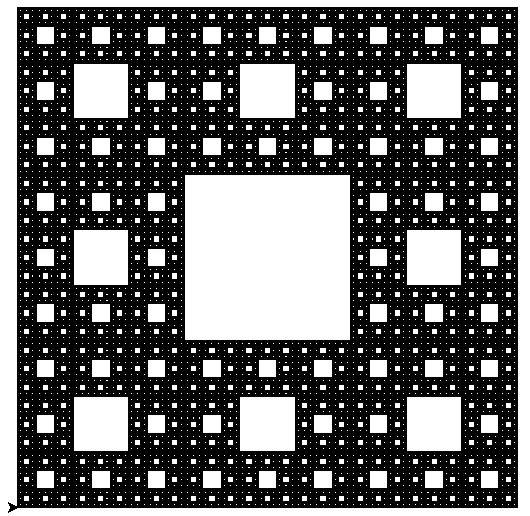

#### Дерево Пифагора

In [3]:
screen = turtle.Screen()
screen.setup(width, height, 0, 0)

t = turtle.Turtle()
t.ht()

pen_width = 2
f_len = 10
angle = 33
axiom = "A"

pif_tree_info = []

t = turtle.Turtle()

for lvl in range(5):
    t.reset()
    t.ht()
    l_sys = LSystem2D(t, axiom, pen_width, f_len, angle)
    l_sys.add_rules(("F", "FF"), ("A", "F[+A][-A]"))
    start = time.time()
    l_sys.generate_path(lvl)
    l_sys.draw_turtle((0, -200), 90)
    finish = round((time.time() - start) * 1000)
    pif_tree_info.append(finish)
    turtle.clear()
for i in range(5):
    print("Глубина", i + 1, "время --- {0:7d} ms ---".format(pif_tree_info[i]))

turtle.done()

Глубина 1 время ---       6 ms ---
Глубина 2 время ---      21 ms ---
Глубина 3 время ---      53 ms ---
Глубина 4 время ---     112 ms ---
Глубина 5 время ---     276 ms ---


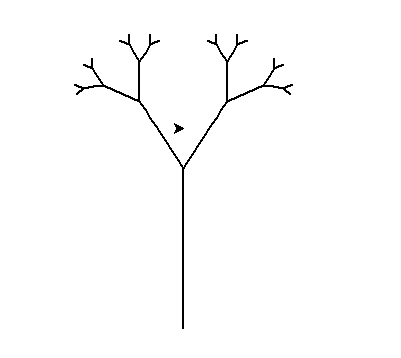

### Вывод
